In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)


In [2]:
df = pd.read_csv('salary_data_cleaned.csv') 

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,company_name,company_txt,job_state,same_state,age,python_yn,excel_yn,R_yn,aws_yn,spark_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,Tecolote Research\n,Tecolote Research\n,NM,0,47,yes,yes,no,no,no
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,University of Maryland Medical System\n,University of Maryland Medical System\n,MD,0,36,yes,no,no,no,no
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,KnowBe4\n,KnowBe4\n,FL,1,10,yes,yes,no,no,yes
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,PNNL\n,PNNL\n,WA,1,55,yes,no,no,no,no
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,Affinity Solutions\n,Affinity Solutions\n,NY,1,22,yes,yes,no,no,no


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'fixed_min_salary', 'avg_salary', 'company_name', 'company_txt',
       'job_state', 'same_state', 'age', 'python_yn', 'excel_yn', 'R_yn',
       'aws_yn', 'spark_yn'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
            
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
   

In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'fixed_min_salary', 'avg_salary', 'company_name', 'company_txt',
       'job_state', 'same_state', 'age', 'python_yn', 'excel_yn', 'R_yn',
       'aws_yn', 'spark_yn', 'job_simp'],
      dtype='object')

In [8]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [9]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [10]:
# Fix state Los Angeles
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [11]:
# Job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0       2536
1       4783
2       3461
3       3883
4       2728
5       3747
6       1786
7       3804
8       1538
9       4574
10      2757
11      3490
12      3934
13      4897
14      3731
15      1889
16      3639
17      4163
18      3512
19      4397
20      2918
21      6909
22      6408
23      2907
24      3760
25      3698
26      4420
27      4900
28      5015
29      3461
30      3883
31      3342
32      5045
33      2327
34      2161
35      1739
36      5000
37      3703
38      3555
39      1739
40      3053
41      1996
42      3833
43      3550
44      9120
45      3213
46      7286
47      3412
48      2682
49      2739
50      2915
51      4244
52      1629
53      4734
54      4448
55      3543
56      4203
57      5020
58      1786
59      3747
60      4804
61      1382
62      2933
63      4945
64      2493
65      1939
66      3081
67      8397
68      2306
69      2291
70      1886
71      2903
72      2653
73      4427
74      2609
75      4295
76      3405

In [12]:
# Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '1' else 0)

In [13]:
df.num_comp

0      1
1      1
2      1
3      3
4      3
5      3
6      1
7      1
8      1
9      2
10     1
11     1
12     3
13     1
14     3
15     1
16     3
17     1
18     1
19     1
20     3
21     1
22     1
23     1
24     3
25     1
26     1
27     1
28     1
29     1
30     3
31     1
32     1
33     1
34     3
35     1
36     1
37     1
38     1
39     1
40     3
41     1
42     1
43     3
44     3
45     1
46     3
47     1
48     3
49     3
50     1
51     3
52     1
53     3
54     1
55     1
56     3
57     2
58     1
59     3
60     1
61     1
62     1
63     3
64     3
65     1
66     1
67     4
68     1
69     1
70     1
71     1
72     1
73     3
74     3
75     1
76     1
77     1
78     1
79     3
80     1
81     1
82     3
83     3
84     1
85     1
86     3
87     1
88     1
89     1
90     1
91     3
92     1
93     1
94     1
95     3
96     3
97     3
98     3
99     1
100    1
101    3
102    3
103    3
104    3
105    1
106    3
107    1
108    3
109    3
110    2
1

In [14]:
#min max test
df[df.hourly==1][['min_salary','max_salary']]

,min_salary,max_salary
165,17,24
177,21,34
197,18,25
202,21,34
210,15,25
246,17,24
271,21,34
337,18,25
345,24,39
357,21,34


In [15]:

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [16]:
df[df.hourly == 1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [22]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n',''))

In [23]:
df['company_txt']

0                                      Tecolote Research
1                  University of Maryland Medical System
2                                                KnowBe4
3                                                   PNNL
4                                     Affinity Solutions
5                                               CyrusOne
6                                     ClearOne Advantage
7                                             Logic20/20
8                              Rochester Regional Health
9                                               <intent>
10                                                  Wish
11                                               ManTech
12                                               Walmart
13                                                Yesler
14                                Takeda Pharmaceuticals
15                                               Audible
16                                   Blueprint Medicines
17                             

In [24]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,fixed_min_salary,avg_salary,same_state,age,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,74.068733,100.626011,0.557951,46.591644,3869.545822,1.673854
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,31.869282,38.855948,0.496965,53.778815,1521.495868,0.918451
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,10.000000,13.500000,0.000000,-1.000000,407.000000,1.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,52.000000,73.500000,0.000000,11.000000,2801.000000,1.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,69.500000,97.500000,1.000000,24.000000,3731.000000,1.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,91.000000,122.500000,1.000000,59.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,202.000000,254.000000,1.000000,276.000000,10051.000000,4.000000


<AxesSubplot:>

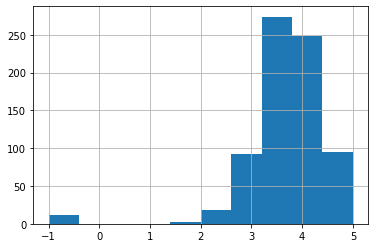

In [25]:
df.Rating.hist()